In [ ]:
# Install necessary libraries
!pip install pyspark pandas numpy seaborn matplotlib

# Data Preprocessing

In [ ]:
# Import the pandas library
import pandas as pd

# Read the data from the dataset
store_data = pd.read_csv("../Dataset/zomato.csv", dtype='unicode')

In [ ]:
store_data.drop_duplicates(subset=['name'],inplace=True)

In [ ]:
data = store_data[['listed_in(city)','rate','votes']]
data = data.rename(columns={'listed_in(city)':'location'})
data.head()
frame = data.copy()
frame['rate']=frame['rate'].str.replace('/5','')
def is_number(s):
    try:
        return float(s)
    except ValueError:
        return 'NaN'
frame.rate = frame.rate.apply(lambda x: is_number(x) )
frame.dropna(subset = ["location","rate","votes"], inplace=True)
frame.rate = frame.rate.astype(float)
frame.votes = frame.votes.astype(int)

In [ ]:
# Calculate mean of vote average column
mean = frame['rate'].mean()
print(mean)
m = frame['votes'].quantile(0.90)

3.62236260265319


In [ ]:
# Function that computes the weighted rating of each restaurant
def weighted_rating(x, m=m, C=mean):
    v = x['votes']
    R = x['rate']
    # Calculation is based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Define a new feature called 'score' and calculate its value
frame['score'] = frame.apply(weighted_rating, axis=1)

# Sort restaurants based on score calculated
frame = frame.sort_values('score', ascending=False)

frame['score'] = frame['score'].round(1)

In [ ]:
# Filter out all qualified restuarants into a new DataFrame

q_restaurants = frame.copy().loc[frame['votes'] >= m]
temp = q_restaurants.groupby('location').size().reset_index(name='count')
list_of_locations = temp[temp['count'] > 40].location.tolist()
q_restaurants_df = q_restaurants[q_restaurants.location.isin(list_of_locations)].copy()
q_restaurants_df

,location,rate,votes,score
3921,Bellandur,4.9,16345,4.9
3762,Bellandur,4.8,7023,4.7
6746,Brookefield,4.9,2745,4.7
9935,BTM,4.8,4390,4.7
8275,BTM,4.9,2178,4.7
...,...,...,...,...
31,Banashankari,2.8,506,3.2
7015,Brookefield,2.8,511,3.2
3900,Bellandur,2.9,827,3.2
1128,Bannerghatta Road,2.6,473,3.1


<AxesSubplot:xlabel='location', ylabel='score'>

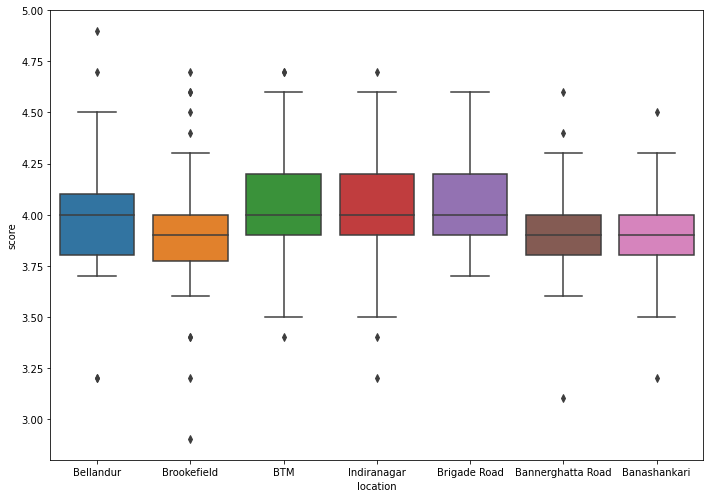

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.boxplot(x="location", y="score", data=q_restaurants_df,ax=ax)
# plt.xticks(rotation=45)

# frame.columns
# frame.boxplot(column=['score'], by='location')
# plt.xticks(rotation=45)